In [2]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import string

In [3]:
df = pd.read_csv("../data/SQuAD-PL/train.csv")

In [4]:
df

,qa_id,group_id,passage_id,context,question,answer_text,answer_start
0,0,0,0,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,Kiedy Beyonce zaczęła być popularna?,pod koniec lat 90.,264
1,2,0,0,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,Kiedy Beyonce opuściła Destiny's Child i zosta...,2003,550
2,4,0,0,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,W której dekadzie Beyonce stała się sławna?,koniec lat 90.,268
3,8,0,0,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,Kiedy Beyoncé zyskała sławę?,koniec lat 90.,268
4,11,0,0,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,Kiedy Beyoncé wydała Dangerously In Love?,2003,550
...,...,...,...,...,...,...,...
78260,130314,441,28,Termin „materia” jest używany w fizyce w oszał...,Fizyka szeroko zgodziła się na definicję czego?,NaN,0
78261,130315,441,28,Termin „materia” jest używany w fizyce w oszał...,Kto ukuł termin materia partonic?,NaN,0
78262,130316,441,28,Termin „materia” jest używany w fizyce w oszał...,Jaka jest inna nazwa antymaterii?,NaN,0
78263,130317,441,28,Termin „materia” jest używany w fizyce w oszał...,Materii zwykle nie trzeba używać w połączeniu ...,NaN,0


In [5]:
df["question"].tolist()

['Kiedy Beyonce zaczęła być popularna?',
 "Kiedy Beyonce opuściła Destiny's Child i została solową piosenkarką?",
 'W której dekadzie Beyonce stała się sławna?',
 'Kiedy Beyoncé zyskała sławę?',
 'Kiedy Beyoncé wydała Dangerously In Love?',
 'Ile nagród Grammy zdobyła Beyoncé za swój pierwszy solowy album?',
 'Aby ustanowić rekord Grammy, ile wygrała Beyonce?',
 'Kiedy Beyonce zrobiła sobie przerwę w karierze i przejęła kontrolę nad swoim kierownictwem?',
 'Jak nazywa się alter ego Beyoncé?',
 'Magazyn Time nazwał ją jedną z 100 najbardziej znanych osób stulecia?',
 'Który magazyn uznał ją za najbardziej dominującą kobietę-muzyk?',
 'W którym dziesięcioleciu Amerykańskie Stowarzyszenie Przemysłu Nagraniowego uznało Beyonce za najlepszego certyfikowanego artystę?',
 'Który magazyn ocenił Beyonce jako najpotężniejszą kobietę w 2015 roku?',
 'Jak Beyonce określiła siebie jako feministkę?',
 'W jakich latach Time ocenił Beyonce wśród 100 najbardziej wpływowych osób na świecie?',
 'Ile płyt

In [12]:
def normalize_text(text):
    text = text.lower()
    text = "".join(c for c in text if c not in set(string.punctuation))
    text = " ".join(text.split())
    text = text.strip()
    return text

In [13]:
questions = sorted(df["question"].unique())
len(questions)

78090

In [16]:
words = Counter([y for x in questions for y in normalize_text(x).split(" ")])

In [17]:
words.most_common(100)

[('w', 31064),
 ('się', 12997),
 ('co', 10449),
 ('jest', 10322),
 ('roku', 9786),
 ('na', 9276),
 ('z', 8518),
 ('jaki', 7792),
 ('do', 7040),
 ('kto', 6736),
 ('kiedy', 6357),
 ('nie', 5685),
 ('i', 5322),
 ('ile', 5156),
 ('jakie', 5130),
 ('jak', 4917),
 ('jaka', 4905),
 ('którym', 4779),
 ('był', 3347),
 ('są', 2744),
 ('jakim', 2477),
 ('że', 2473),
 ('który', 2416),
 ('gdzie', 2262),
 ('po', 2228),
 ('o', 2180),
 ('czego', 2118),
 ('za', 2029),
 ('od', 1986),
 ('przez', 1985),
 ('ma', 1831),
 ('była', 1804),
 ('jako', 1639),
 ('jakiego', 1590),
 ('dla', 1589),
 ('czym', 1490),
 ('które', 1468),
 ('został', 1464),
 ('ilu', 1394),
 ('było', 1275),
 ('która', 1275),
 ('jaką', 1265),
 ('jakiej', 1235),
 ('procent', 1207),
 ('aby', 1150),
 ('wieku', 1095),
 ('pierwszy', 1078),
 ('nazywa', 1070),
 ('znajduje', 1032),
 ('dlaczego', 1016),
 ('to', 950),
 ('kim', 901),
 ('można', 896),
 ('jakich', 887),
 ('zostało', 877),
 ('może', 868),
 ('pod', 820),
 ('czy', 776),
 ('latach', 766),
 (

In [18]:
first_word = Counter([normalize_text(x).split(" ")[0] for x in questions])

In [19]:
first_word.most_common(100)

[('co', 8497),
 ('w', 7972),
 ('jaki', 6943),
 ('kto', 6639),
 ('kiedy', 5990),
 ('jakie', 4818),
 ('jaka', 4808),
 ('ile', 4642),
 ('jak', 4199),
 ('gdzie', 2151),
 ('który', 1549),
 ('z', 1308),
 ('ilu', 1181),
 ('na', 1165),
 ('do', 1056),
 ('dlaczego', 992),
 ('jaką', 937),
 ('czego', 861),
 ('która', 808),
 ('czym', 796),
 ('kim', 653),
 ('jakiego', 636),
 ('które', 636),
 ('czy', 518),
 ('od', 410),
 ('kogo', 368),
 ('o', 361),
 ('skąd', 308),
 ('jakim', 288),
 ('jakiej', 259),
 ('za', 239),
 ('komu', 196),
 ('jakich', 182),
 ('po', 169),
 ('którzy', 147),
 ('przez', 144),
 ('poza', 121),
 ('dokąd', 114),
 ('jacy', 114),
 ('według', 110),
 ('czyje', 100),
 ('pod', 97),
 ('dla', 94),
 ('jeśli', 94),
 ('wymień', 71),
 ('czemu', 69),
 ('którą', 69),
 ('oprócz', 67),
 ('jakimi', 61),
 ('czyja', 60),
 ('czyj', 57),
 ('przed', 54),
 ('wraz', 51),
 ('którego', 44),
 ('podczas', 42),
 ('jakiemu', 35),
 ('któż', 32),
 ('nad', 28),
 ('chociaż', 27),
 ('uważa', 27),
 ('aby', 26),
 ('większo

In [20]:
first_two_words = Counter([" ".join(normalize_text(x).split(" ")[:2]) for x in questions])

In [21]:
first_two_words.most_common(100)

[('w którym', 4421),
 ('jaka jest', 1626),
 ('jaki jest', 1601),
 ('w jakim', 1563),
 ('jaki procent', 990),
 ('jak nazywa', 893),
 ('kto był', 891),
 ('jaka była', 881),
 ('jaki był', 803),
 ('jakie są', 719),
 ('jaki rodzaj', 565),
 ('co jest', 532),
 ('jak długo', 475),
 ('do czego', 459),
 ('jakie jest', 452),
 ('w jakiej', 400),
 ('ile osób', 381),
 ('w jaki', 334),
 ('w jakich', 326),
 ('co nie', 303),
 ('jak nazywał', 295),
 ('co się', 293),
 ('czym jest', 290),
 ('kto jest', 290),
 ('co oznacza', 287),
 ('z jakiego', 278),
 ('na co', 261),
 ('z czego', 259),
 ('czego nie', 243),
 ('kto został', 240),
 ('co to', 237),
 ('co zostało', 231),
 ('kto nie', 230),
 ('kto napisał', 227),
 ('jaka część', 226),
 ('gdzie znajduje', 218),
 ('gdzie jest', 215),
 ('jaka grupa', 215),
 ('ile lat', 213),
 ('kim był', 211),
 ('jakiego rodzaju', 196),
 ('do jakiego', 193),
 ('kim jest', 190),
 ('na jakim', 178),
 ('co było', 177),
 ('który kraj', 174),
 ('z kim', 174),
 ('jakie było', 171),
 ('k

In [34]:
total = sum(first_word.values())
for x in first_word.most_common(10):
    print(x[0], x[1] / total)

co 0.10881034703547189
w 0.1020873351261365
jaki 0.08891023178383917
kto 0.08501728774490971
kiedy 0.07670636445127417
jakie 0.061698040722243566
jaka 0.06156998335254194
ile 0.05944423101549494
jak 0.053771289537712895
gdzie 0.027545140222819824


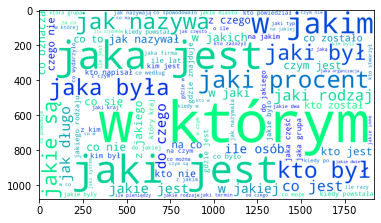

In [23]:
wordcloud = WordCloud(width=1920, height=1080, background_color="white", relative_scaling="auto", colormap="winter", max_words=100).generate_from_frequencies(first_two_words)
wordcloud.to_file("question_words.png")
plt.imshow(wordcloud)
plt.show()